## **Well Being Prediction Analysis**

# Loading Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier


#Data Loading 

In [ ]:
#reading in CSV's from a file path
mental_df = pd.read_csv('/content/mentalhealth.csv')
print(mental_df.shape)
print(mental_df.describe())
print(mental_df.info())

(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-n

In [ ]:
mental_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


#Data Cleaning and Preprocessing

To check for missing values and handle those 


In [ ]:
print("Number of rows and columns",mental_df.shape)
total = mental_df.isnull().sum().sort_values(ascending=False)
print(total)


Number of rows and columns (1259, 27)
comments                     1095
state                         515
work_interfere                264
self_employed                  18
seek_help                       0
obs_consequence                 0
mental_vs_physical              0
phys_health_interview           0
mental_health_interview         0
supervisor                      0
coworkers                       0
phys_health_consequence         0
mental_health_consequence       0
leave                           0
anonymity                       0
Timestamp                       0
wellness_program                0
Age                             0
benefits                        0
tech_company                    0
remote_work                     0
no_employees                    0
treatment                       0
family_history                  0
Country                         0
Gender                          0
care_options                    0
dtype: int64


We observed the missing values in Comments,state and work_interfere.so we will be handlibg those missing values by dropping them





In [ ]:
mental_df = mental_df.drop(['comments','state','Timestamp','Country'], axis= 1)

mental_df.isnull().sum().max() #just checking that there's no missing data missing...
mental_df.head(5)

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


Assign Default values

In [ ]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# Fill with default values
for feature in mental_df:
    if feature in intFeatures:
        mental_df[feature] = mental_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        mental_df[feature] = mental_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        mental_df[feature] = mental_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
mental_df.head(5)   

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


Part of cleaning.Categorizing the varibales in rows

In [ ]:
#clean 'Gender'
#lower case all columm's elements
gender = mental_df['Gender'].str.lower()


#Select unique elements
gender = mental_df['Gender'].unique()

#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in mental_df.iterrows():

    if str.lower(col.Gender) in male_str:
        mental_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        mental_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        mental_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

stk_list = ['A little about you', 'p']
mental_df = mental_df[~mental_df['Gender'].isin(stk_list)]

print(mental_df['Gender'].unique())

['female' 'male' 'trans']


Categorizing the age into few bucktes to make it more categorical 

In [ ]:
#complete missing age with mean
mental_df['Age'].fillna(mental_df['Age'].median(), inplace = True)

# Fill with median() values < 18 and > 120
s = pd.Series(mental_df['Age'])
s[s<18] = mental_df['Age'].median()
mental_df['Age'] = s
s = pd.Series(mental_df['Age'])
s[s>120] = mental_df['Age'].median()
mental_df['Age'] = s

#Ranges of Age
mental_df['age_range'] = pd.cut(mental_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)



In [ ]:
mental_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,37,female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,31-65
1,44,male,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,31-65
2,32,male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,31-65
3,31,male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,31-65
4,31,male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,31-65


To Replace NAN values we used it here to replace it with NO as the percenatge of number of self_employed is very less.

In [ ]:
mental_df['self_employed'] = mental_df['self_employed'].replace([defaultString], 'No')
print(mental_df['self_employed'].unique())

['No' 'Yes']


We are replacing NAN values here with "Don't Know" becuase the percentage of this category is very low.

In [ ]:
mental_df['work_interfere'] = mental_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(mental_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


##Data Visualization/Exploratory Data analysis

Employers who Provide Health Benefits:

Yes           475
Don't know    408
No            374
Name: benefits, dtype: int64


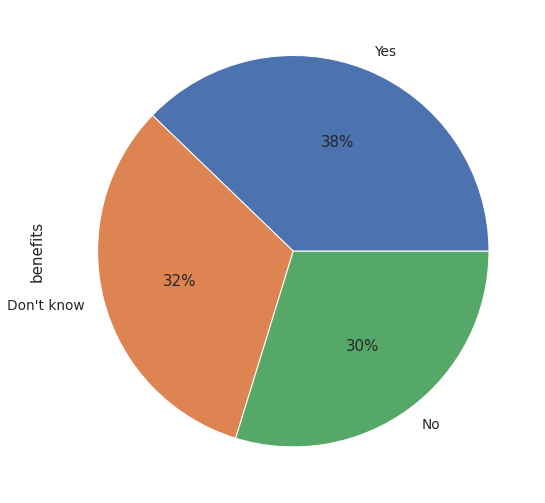

In [ ]:
print(mental_df['benefits'].value_counts())

mental_df['benefits'].value_counts().plot.pie(figsize=(13,9), autopct='%1.0f%%')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


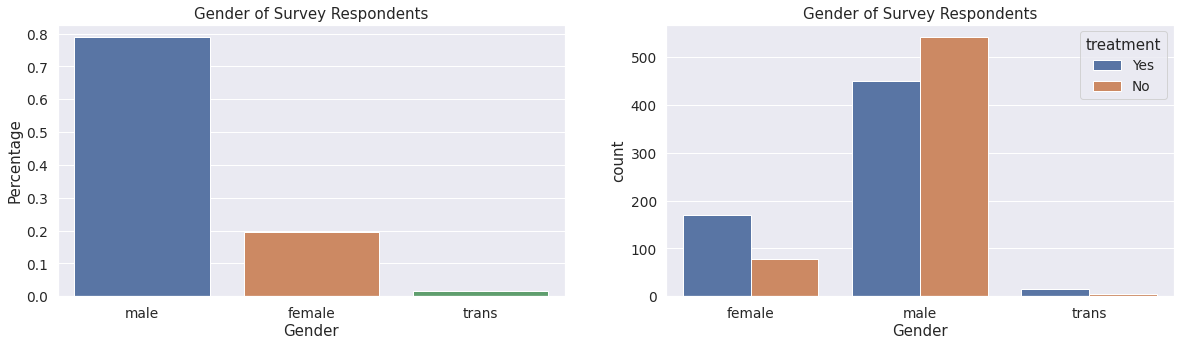

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = mental_df['Gender'].value_counts(normalize = True).rename_axis('Gender').reset_index(name = 'Percentage')
sns.barplot(x = 'Gender', y = 'Percentage', data = eda_percentage.head(10))
plt.title('Gender of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(mental_df['Gender'], hue = mental_df['treatment'])
plt.title('Gender of Survey Respondents')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age')

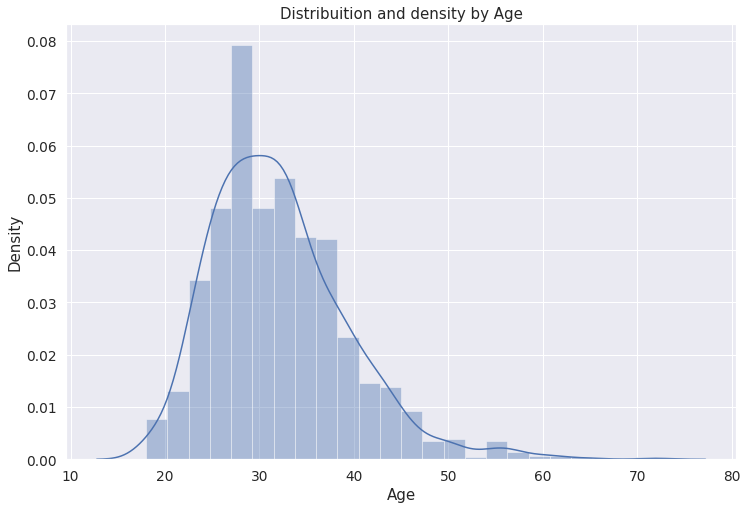

In [ ]:
# Distribiution and density by Age
plt.figure(figsize=(12,8))
sns.distplot(mental_df["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


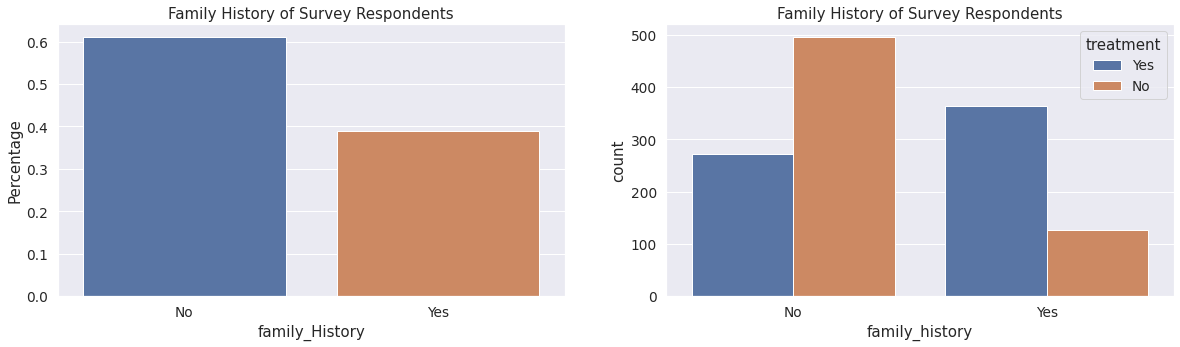

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = mental_df['family_history'].value_counts(normalize = True).rename_axis('family_History').reset_index(name = 'Percentage')
sns.barplot(x = 'family_History', y = 'Percentage', data = eda_percentage)
plt.title('Family History of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(mental_df['family_history'], hue = mental_df['treatment'])
plt.title('Family History of Survey Respondents')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


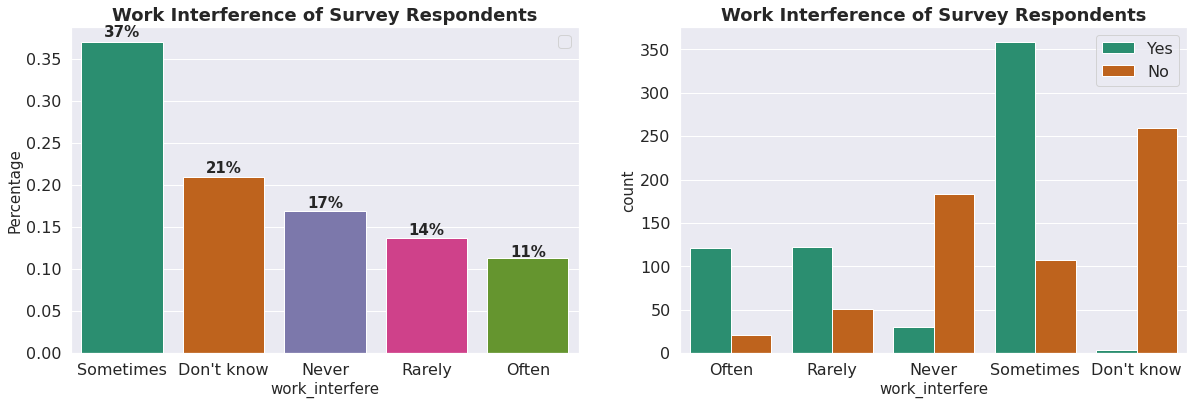

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = mental_df['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'work_interfere', y = 'Percentage', data = eda_percentage, palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(mental_df['work_interfere'], hue = mental_df['treatment'],  palette=dict(No = '#d95f02', Yes = '#1b9e77'))
plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


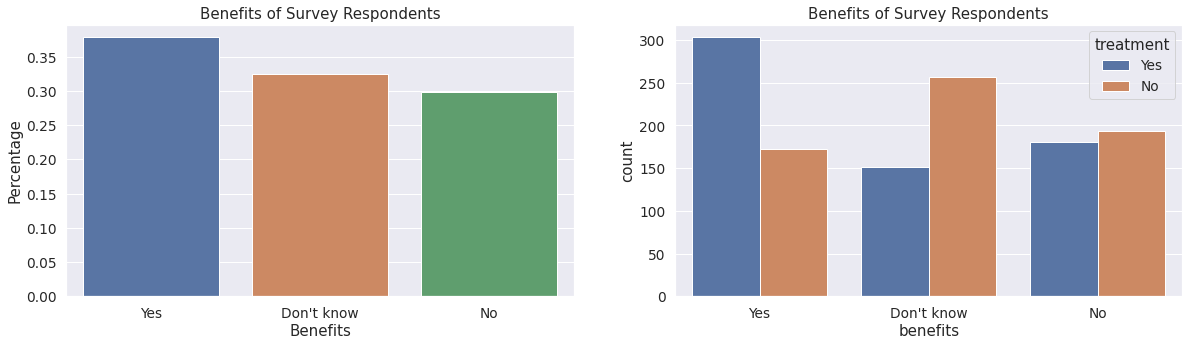

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = mental_df['benefits'].value_counts(normalize = True).rename_axis('Benefits').reset_index(name = 'Percentage')
sns.barplot(x = 'Benefits', y = 'Percentage', data = eda_percentage)
plt.title('Benefits of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(mental_df['benefits'], hue = mental_df['treatment'])
plt.title('Benefits of Survey Respondents')
plt.show()

**Encoding** :Encoding is a part of preprocessing ,which we use to transform the categorical values of the relevant features into numerical ones.As the machine learning models can only work with the numerical ones.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler


In [ ]:
labelDict = {}
for feature in mental_df:
    le = preprocessing.LabelEncoder()
    le.fit(mental_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    mental_df[feature] = le.transform(mental_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)


label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_employees ['1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000']
label_remote_work ['No', 'Yes']
label_tech_company ['No', 'Yes']
label_benefits ["Don't know", 'No', 'Yes']
label_care_options ['No', 'Not sure', 'Yes']
label_wellness_program ["Don't know", 'No', 'Yes']
label_seek_help ["Don't know", 'No', 'Yes']
label_anonymity ["Don't know", 'No', 'Yes']
label_leave ["Don't know", 'Somewhat difficult', 'Somewhat easy', 'Very difficult', 'Very easy']
label_mental_health_consequence ['Maybe', 'No', 'Yes']
label_phys_health_consequence ['Maybe', 'No', 'Yes']
label_cow

Text(0.5, 1.0, 'Total Distribuition by treated or not')

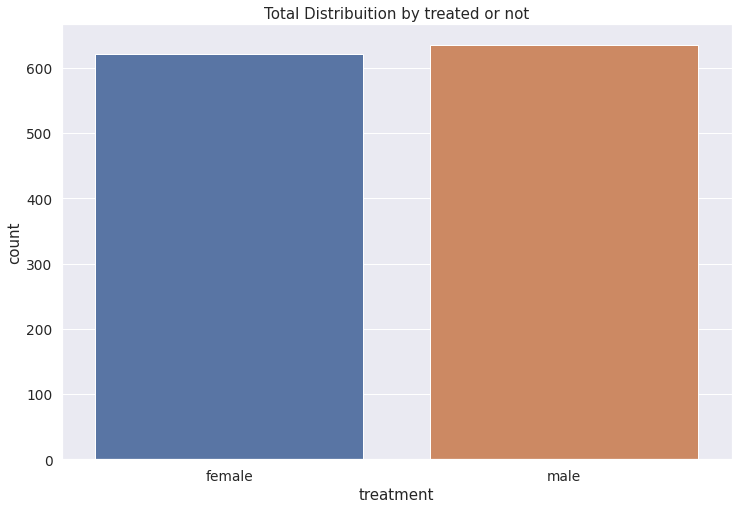

In [ ]:
plt.figure(figsize=(12,8))
labels = labelDict['label_Gender']
g = sns.countplot(x="treatment", data=mental_df)
g.set_xticklabels(labels)

plt.title('Total Distribuition by treated or not')

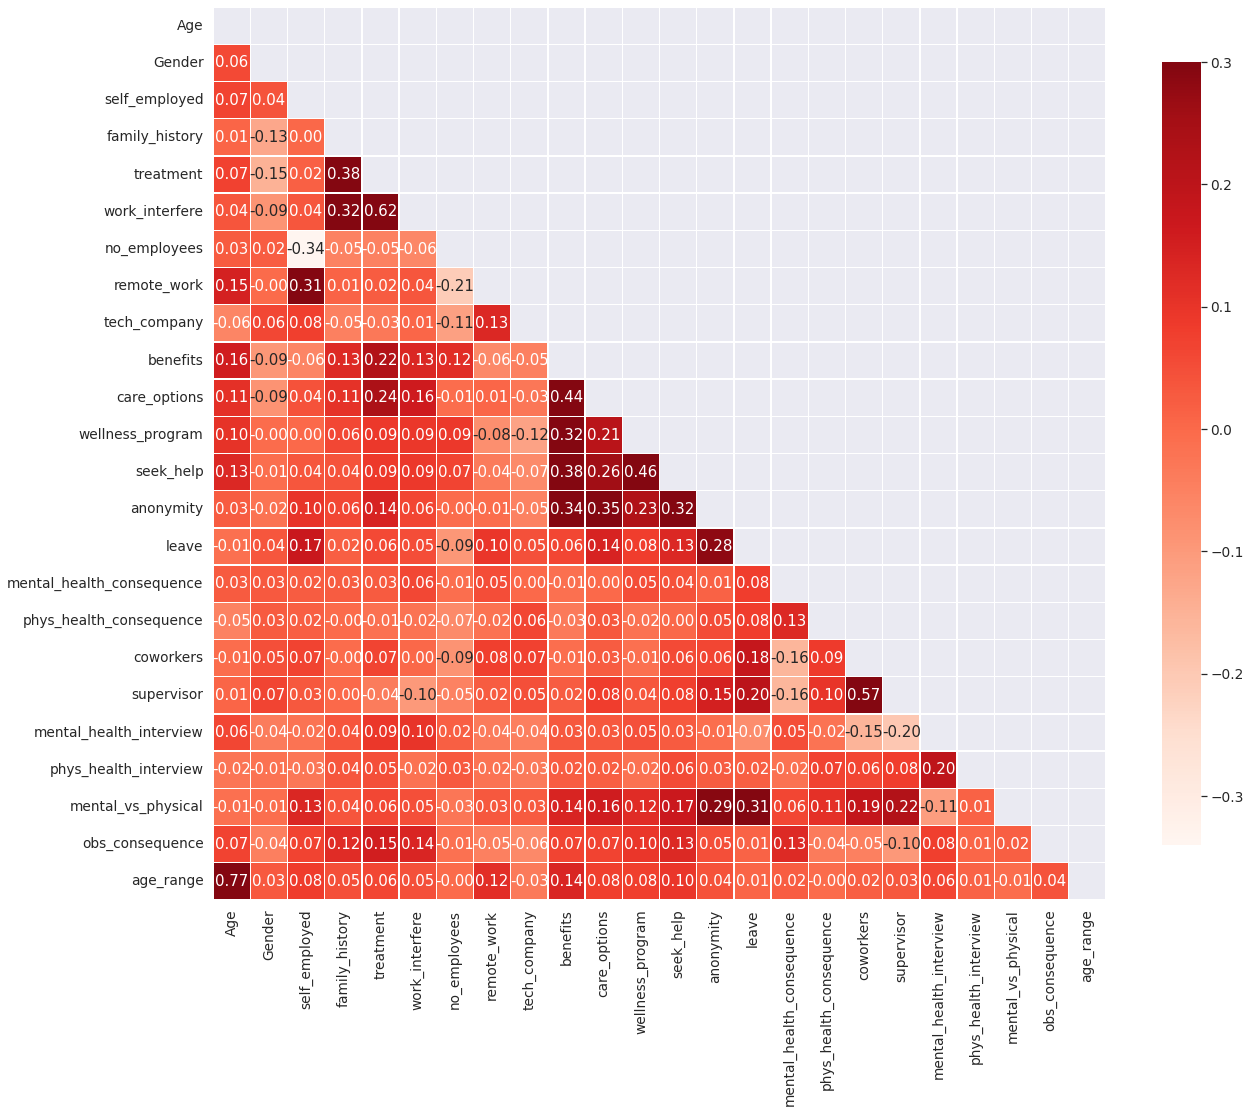

In [ ]:
# Compute the correlation matrix
corr = mental_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))


f, ax = plt.subplots(figsize=(20, 24))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Reds', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .6}, fmt='.2f',annot = True)

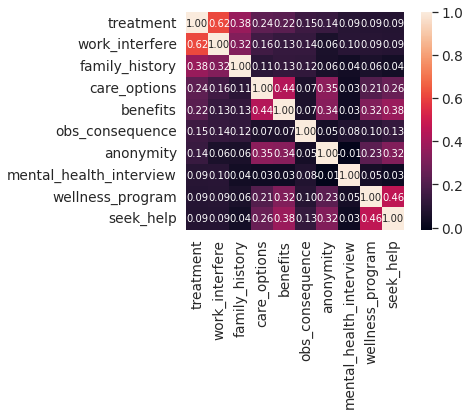

In [ ]:
#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(mental_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,  fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
scaler = MinMaxScaler()
mental_df['Age'] = scaler.fit_transform(mental_df[['Age']])
mental_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


Data Partitioning

In [ ]:

feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']

X = mental_df[feature_cols]
y = mental_df.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)                       

#Data Modelling

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)
# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred_class = logreg.predict(X_test)
log=metrics.accuracy_score(y_test, y_pred_class)           
print('Logistic Regression Model-Accuracy:', log)

Logistic Regression Model-Accuracy: 0.798941798941799


confusion matrix 


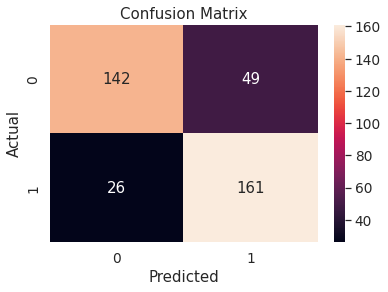

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("confusion matrix ")
sns.heatmap(confusion,annot=True,fmt="d") 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree_clf = DecisionTreeClassifier(max_depth=2, random_state = 36)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=36)

In [ ]:
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()
featuresSize = feature_cols.__len__()


    
    # train a decision tree model on the training set
tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=6,
                       min_samples_leaf=7, min_samples_split=8)

In [ ]:
y_pred_class = tree.predict(X_test)
treeac=metrics.accuracy_score(y_test, y_pred_class)

print('Decision Tree Model-Accuracy:', treeac)

Decision Tree Model-Accuracy: 0.8068783068783069


confusion matrix 


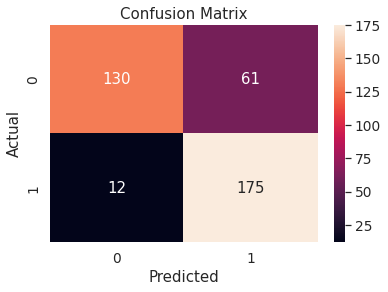

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("confusion matrix ")
sns.heatmap(confusion,annot=True,fmt="d") 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Random Forest**

In [ ]:
forest = RandomForestClassifier(n_estimators = 20)

featuresSize = feature_cols.__len__()
       
# Building and fitting my_forest
forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
my_forest = forest.fit(X_train, y_train)

In [ ]:
y_pred_class = my_forest.predict(X_test)
randac=metrics.accuracy_score(y_test, y_pred_class)
print('Random Forest Model-Accuracy:',randac )

Random Forest Model-Accuracy: 0.8121693121693122


confusion matrix 


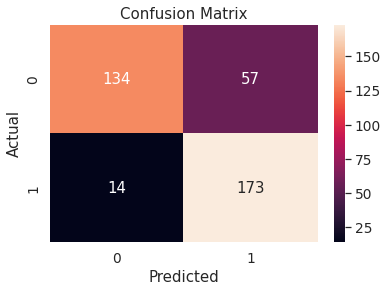

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("confusion matrix ")
sns.heatmap(confusion,annot=True,fmt="d") 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**KNeighbors Classifier**





In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
y_pred_class = knn.predict(X_test)
knnac=metrics.accuracy_score(y_test, y_pred_class)
print('K Neighbor Model-Accuracy:',knnac )

K Neighbor Model-Accuracy: 0.8359788359788359


confusion matrix 


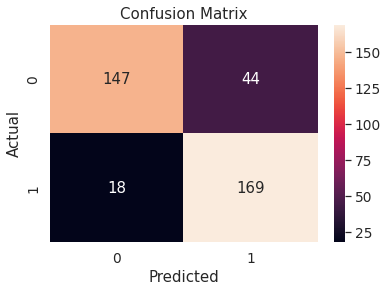

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("confusion matrix ")
sns.heatmap(confusion,annot=True,fmt="d") 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##Comparision of Models

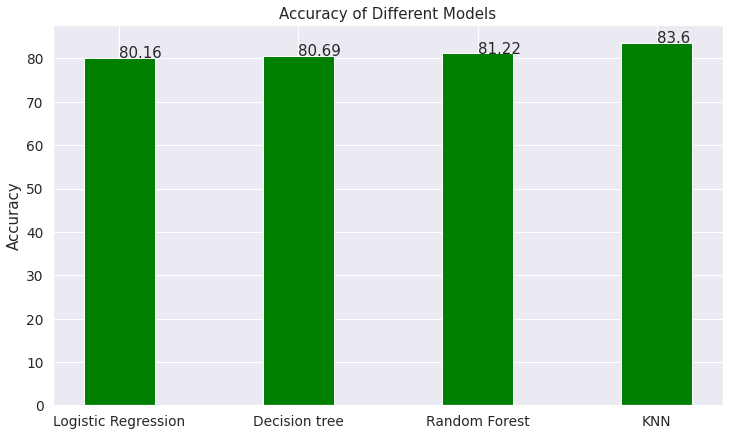

In [ ]:

data = {'Logistic Regression':log*100, 'Decision tree':treeac*100, 'Random Forest':randac*100,
		'KNN':knnac*100}
models = list(data.keys())
accuracies = list(data.values())
accuracies.sort()

fig = plt.figure(figsize = (12, 7))

for i in range(len(models)):
        plt.text(i,round(accuracies[i],2),round(accuracies[i],2))

# creating the bar plot
plt.bar(models, accuracies, color ='green',width = 0.4,)


plt.ylabel("Accuracy")

plt.title("Accuracy of Different Models")
plt.show()
